In [104]:
import numpy as np
import pandas as pd

In [105]:
file_path = 'International students Time management data.csv'
data = pd.read_csv(file_path)

In [106]:
data.head()

,Number,Age,Gender,Nationality,Program,Course,English,Academic,Attendance,6,...,8,9,10,11,12,13,14,15,16,17
0,1,31-35,M,Korea,PM,Social Sciences and Humanities,60%~70%,NaN,S0,Disagree,...,Strong Agree,Neither,Agree,Neither,Disagree,Strong Disagree,Strong Agree,Neither,Disagree,Agree
1,2,26-30,M,China,PM,Science and engineering,60%~70%,50%~59%,S3,Strong Agree,...,Neither,Disagree,Agree,Neither,Disagree,Strong Disagree,Neither,Agree,Neither,Disagree
2,3,26-30,M,Kenya,PM,Business,60%~70%,NaN,S0,Disagree,...,Agree,Disagree,Agree,Agree,Disagree,Strong Disagree,Disagree,Strong Agree,Strong Agree,Disagree
3,4,21-25,M,Vietnam,PM,Law/Legal studies,60%~70%,60%~70%,S0,Disagree,...,Agree,Agree,Disagree,Agree,Neither,Neither,Neither,Neither,Disagree,Agree
4,5,21-25,M,China,PM,Business,60%~70%,50%~59%,S1,Neither,...,Neither,Neither,Disagree,Neither,Neither,Neither,Neither,Disagree,Neither,Agree


In [107]:
file_path2 = 'Sheet2.csv'
data2 = pd.read_csv(file_path2)

In [108]:
data2.head()

,Order,Questions,Option & scores,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,Strong agree,Agree,Neither Agree or Disagree,Disagree,Strong disagree
1,6.0,"You often feel that your life is aimless, with no definite purpose",1,2,3,4,5
2,7.0,You never have trouble organizing the things you have to do?,5,4,3,2,1
3,8.0,"Once you've started an activity, you persist at it until you've completed it",5,4,3,2,1
4,9.0,Sometimes you feel that the things you have to do during the day just don't seem to matter,1,2,3,4,5


In [109]:
pd.set_option('display.max_colwidth', None)

In [110]:
data2.head()

,Order,Questions,Option & scores,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,NaN,Strong agree,Agree,Neither Agree or Disagree,Disagree,Strong disagree
1,6.0,"You often feel that your life is aimless, with no definite purpose",1,2,3,4,5
2,7.0,You never have trouble organizing the things you have to do?,5,4,3,2,1
3,8.0,"Once you've started an activity, you persist at it until you've completed it",5,4,3,2,1
4,9.0,Sometimes you feel that the things you have to do during the day just don't seem to matter,1,2,3,4,5


In [111]:
new_columns = ['Order', 'Questions'] + data2.iloc[0, 2:].tolist()
data2.columns = new_columns

data2 = data2.drop(index=0).reset_index(drop=True)

In [112]:
data2.head()

,Order,Questions,Strong agree,Agree,Neither Agree or Disagree,Disagree,Strong disagree
0,6.0,"You often feel that your life is aimless, with no definite purpose",1,2,3,4,5
1,7.0,You never have trouble organizing the things you have to do?,5,4,3,2,1
2,8.0,"Once you've started an activity, you persist at it until you've completed it",5,4,3,2,1
3,9.0,Sometimes you feel that the things you have to do during the day just don't seem to matter,1,2,3,4,5
4,10.0,You will plan your activities from day to day.,5,4,3,2,1


In [113]:
question_scoring = {}

for index, row in data2.iterrows():
    question_num = int(row['Order'])  
    question_scoring[question_num] = {
        "Strong Agree": row['Strong agree'],
        "Agree": row['Agree'],
        "Neither": row['Neither Agree or Disagree'],
        "Disagree": row['Disagree'],
        "Strong Disagree": row['Strong disagree'] 
    }

In [114]:
def assign_scores(row):
    for col in data.columns[9:]:  
        question_num = int(col) 
        scoring_map = question_scoring[question_num]
        row[col] = scoring_map.get(row[col], row[col])
    return row

In [115]:
data = data.apply(assign_scores, axis=1)

In [116]:
data

,Number,Age,Gender,Nationality,Program,Course,English,Academic,Attendance,6,...,8,9,10,11,12,13,14,15,16,17
0,1,31-35,M,Korea,PM,Social Sciences and Humanities,60%~70%,NaN,S0,4,...,5,3,4,3,4,5,5,3,4,4
1,2,26-30,M,China,PM,Science and engineering,60%~70%,50%~59%,S3,1,...,3,4,4,3,4,5,3,2,3,2
2,3,26-30,M,Kenya,PM,Business,60%~70%,NaN,S0,4,...,4,4,4,2,4,5,2,1,1,2
3,4,21-25,M,Vietnam,PM,Law/Legal studies,60%~70%,60%~70%,S0,4,...,4,2,2,2,3,3,3,3,4,4
4,5,21-25,M,China,PM,Business,60%~70%,50%~59%,S1,3,...,3,3,2,3,3,3,3,4,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,121,21-25,M,China,PM,Business,60%~70%,50%~59%,S1,4,...,4,3,2,4,3,4,2,2,3,4
121,122,31-35,F,China,PM,Business,50%~59%,50%~59%,S1,2,...,3,2,3,1,2,2,2,2,1,4
122,123,26-30,M,Gongo,PM,Business,>70%,60%~70%,S0,5,...,3,3,3,3,3,5,2,1,4,3
123,124,21-25,F,Ukraine,PM,Business,60%~70%,60%~70%,S1,2,...,2,1,2,2,2,5,2,1,4,2


In [117]:
data2

,Order,Questions,Strong agree,Agree,Neither Agree or Disagree,Disagree,Strong disagree
0,6.0,"You often feel that your life is aimless, with no definite purpose",1,2,3,4,5
1,7.0,You never have trouble organizing the things you have to do?,5,4,3,2,1
2,8.0,"Once you've started an activity, you persist at it until you've completed it",5,4,3,2,1
3,9.0,Sometimes you feel that the things you have to do during the day just don't seem to matter,1,2,3,4,5
4,10.0,You will plan your activities from day to day.,5,4,3,2,1
5,11.0,You tend to leave things to the last minute?,1,2,3,4,5
6,12.0,You tend to change rather aimlessly from one activity to another during the day.,1,2,3,4,5
7,13.0,You give up the things that you planning to do just because your friend says no.,1,2,3,4,5
8,14.0,You think you do enough with your time.,5,4,3,2,1
9,15.0,You are easy to get bored with your day-today activities.,1,2,3,4,5


In [118]:
time_management_questions = ['7', '8', '10', '17', '14'] 
attitudes_questions = ['6', '9', '11', '12', '13', '15', '16'] 

In [119]:
data['Time Management Score'] = data[time_management_questions].astype(float).mean(axis=1).round(1)
data['Attitudes Score'] = data[attitudes_questions].astype(float).mean(axis=1).round(1)

In [120]:
data.head()

,Number,Age,Gender,Nationality,Program,Course,English,Academic,Attendance,6,...,10,11,12,13,14,15,16,17,Time Management Score,Attitudes Score
0,1,31-35,M,Korea,PM,Social Sciences and Humanities,60%~70%,NaN,S0,4,...,4,3,4,5,5,3,4,4,4.4,3.7
1,2,26-30,M,China,PM,Science and engineering,60%~70%,50%~59%,S3,1,...,4,3,4,5,3,2,3,2,3.2,3.1
2,3,26-30,M,Kenya,PM,Business,60%~70%,NaN,S0,4,...,4,2,4,5,2,1,1,2,3.4,3.0
3,4,21-25,M,Vietnam,PM,Law/Legal studies,60%~70%,60%~70%,S0,4,...,2,2,3,3,3,3,4,4,3.0,3.0
4,5,21-25,M,China,PM,Business,60%~70%,50%~59%,S1,3,...,2,3,3,3,3,4,3,4,2.8,3.1


In [121]:
import matplotlib.pyplot as plt

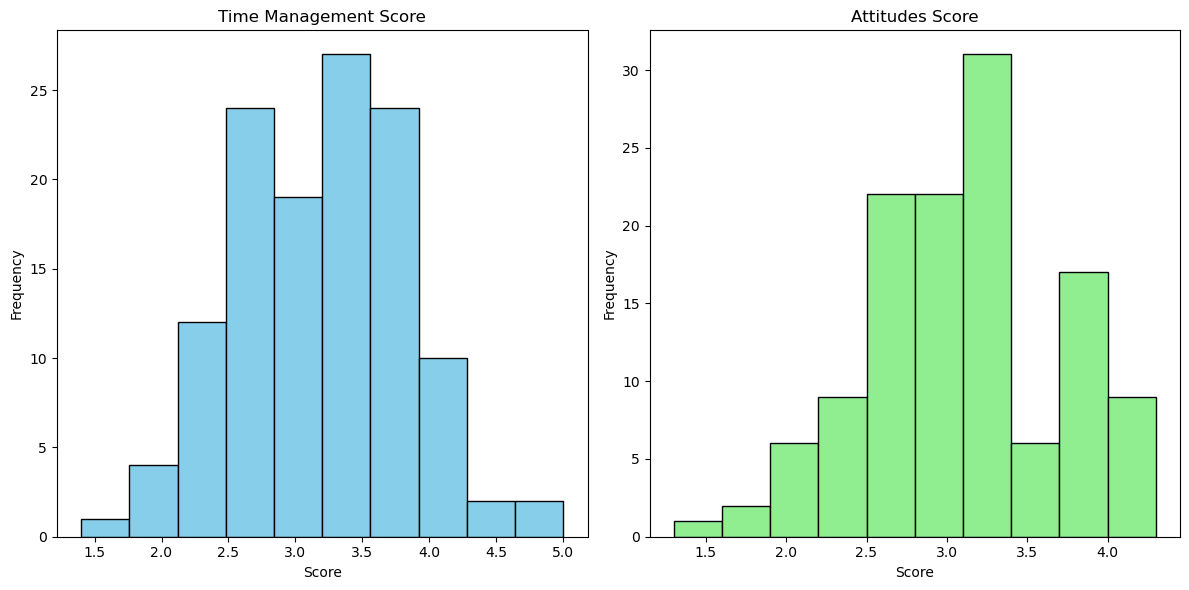

In [122]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

axs[0].hist(data['Time Management Score'], bins=10, color='skyblue', edgecolor='black')
axs[0].set_title('Time Management Score')
axs[0].set_xlabel('Score')
axs[0].set_ylabel('Frequency')

axs[1].hist(data['Attitudes Score'], bins=10, color='lightgreen', edgecolor='black')
axs[1].set_title('Attitudes Score')
axs[1].set_xlabel('Score')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

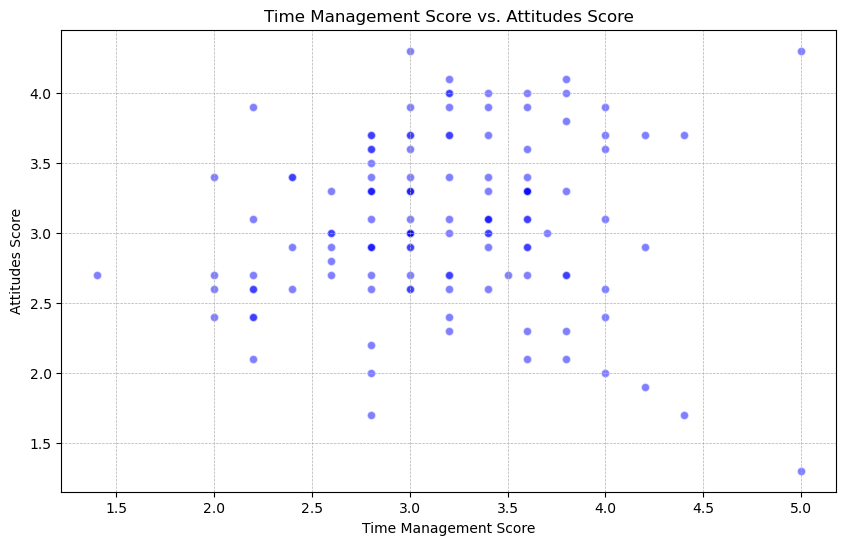

In [123]:
plt.figure(figsize=(10, 6)) 
plt.scatter(data['Time Management Score'], data['Attitudes Score'], alpha=0.5, edgecolors='w', color='blue')
plt.title('Time Management Score vs. Attitudes Score')
plt.xlabel('Time Management Score')
plt.ylabel('Attitudes Score')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()

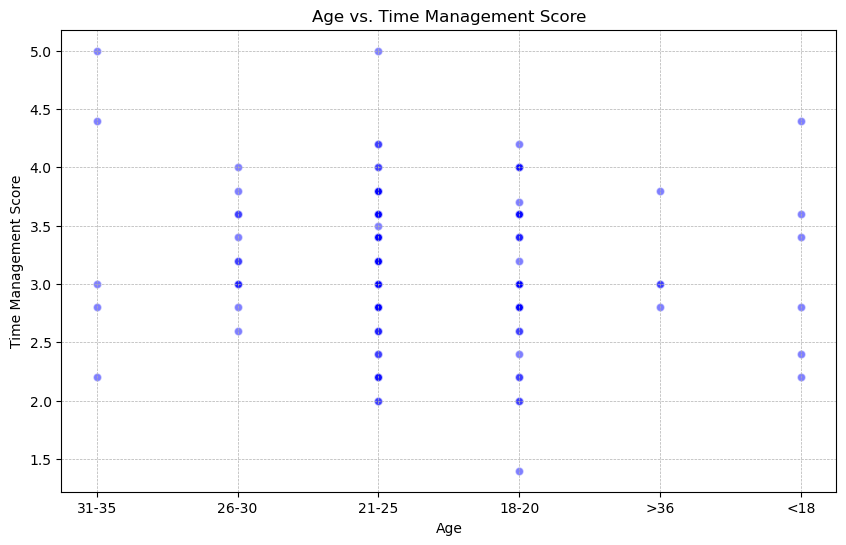

In [124]:
plt.figure(figsize=(10, 6)) 
plt.scatter(data['Age'], data['Time Management Score'], alpha=0.5, edgecolors='w', color='blue')
plt.title('Age vs. Time Management Score')
plt.xlabel('Age')
plt.ylabel('Time Management Score')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()